In [1]:
import pandas as pd
import sqlite3 

In [2]:
conn = sqlite3.connect('alexia')
#print(sqlite3.version)

df = pd.read_excel('dataset.xlsx')
df

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1
916,57,femme,AA,130,236,0,LVH,174,Non,0.0,Plat,1


In [3]:
df.describe(include='all')

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
count,918.000000,918,918,918.000000,918.000000,918.000000,918,918.000000,918,918.000000,918,918.000000
unique,NaN,2,4,NaN,NaN,NaN,3,NaN,2,NaN,3,NaN
top,NaN,homme,ASY,NaN,NaN,NaN,Normal,NaN,Non,NaN,Plat,NaN
freq,NaN,725,496,NaN,NaN,NaN,552,NaN,547,NaN,460,NaN
mean,53.510893,NaN,NaN,132.396514,198.799564,0.233115,NaN,136.809368,NaN,0.887364,NaN,0.553377
std,9.432617,NaN,NaN,18.514154,109.384145,0.423046,NaN,25.460334,NaN,1.066570,NaN,0.497414
min,28.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,60.000000,NaN,-2.600000,NaN,0.000000
25%,47.000000,NaN,NaN,120.000000,173.250000,0.000000,NaN,120.000000,NaN,0.000000,NaN,0.000000
50%,54.000000,NaN,NaN,130.000000,223.000000,0.000000,NaN,138.000000,NaN,0.600000,NaN,1.000000
75%,60.000000,NaN,NaN,140.000000,267.000000,0.000000,NaN,156.000000,NaN,1.500000,NaN,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE          918 non-null    int64  
 1   SEXE         918 non-null    object 
 2   TDT          918 non-null    object 
 3   PAR          918 non-null    int64  
 4   CHOLESTEROL  918 non-null    int64  
 5   GAJ          918 non-null    int64  
 6   ECG          918 non-null    object 
 7   FCMAX        918 non-null    int64  
 8   ANGINE       918 non-null    object 
 9   DEPRESSION   918 non-null    float64
 10  PENTE        918 non-null    object 
 11  CŒUR         918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.isna().sum()

AGE            0
SEXE           0
TDT            0
PAR            0
CHOLESTEROL    0
GAJ            0
ECG            0
FCMAX          0
ANGINE         0
DEPRESSION     0
PENTE          0
CŒUR           0
dtype: int64

<AxesSubplot:ylabel='Frequency'>

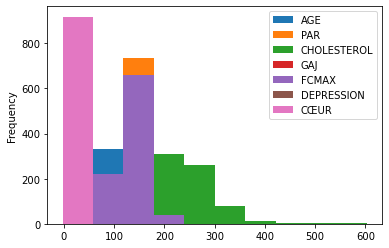

In [6]:
df.plot.hist()

In [7]:
df.corr(method='pearson')

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
AGE,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
PAR,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
CHOLESTEROL,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
GAJ,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
FCMAX,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
DEPRESSION,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
CŒUR,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [8]:
df.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2).set_properties(**{'font-size': '8pt'})

/var/folders/xh/992blmm116gfjsjxnphl232w0000gn/T/ipykernel_34819/3207794172.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient(cmap='coolwarm', axis=None).set_precision(2).set_properties(**{'font-size': '8pt'})


,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
AGE,1.00,0.25,-0.10,0.20,-0.38,0.26,0.28
PAR,0.25,1.00,0.10,0.07,-0.11,0.16,0.11
CHOLESTEROL,-0.10,0.10,1.00,-0.26,0.24,0.05,-0.23
GAJ,0.20,0.07,-0.26,1.00,-0.13,0.05,0.27
FCMAX,-0.38,-0.11,0.24,-0.13,1.00,-0.16,-0.40
DEPRESSION,0.26,0.16,0.05,0.05,-0.16,1.00,0.40
CŒUR,0.28,0.11,-0.23,0.27,-0.40,0.40,1.00


<AxesSubplot:>

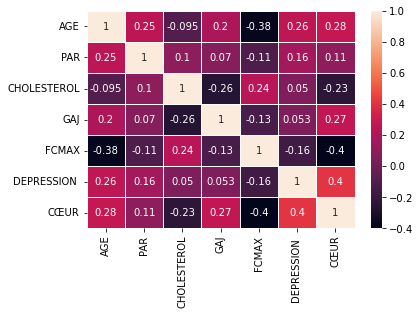

In [9]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

In [25]:
#is_sick =  df[df.CŒUR==1]
has_Angine = df[df.ANGINE == 'Oui']

In [27]:
has_Angine

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
11,58,homme,AA,136,164,0,ST,99,Oui,2.0,Plat,1
13,49,homme,ASY,140,234,0,Normal,140,Oui,1.0,Plat,1
23,44,homme,AA,150,288,0,Normal,150,Oui,3.0,Plat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
907,44,homme,ASY,120,169,0,Normal,144,Oui,2.8,Descendant,1
908,63,homme,ASY,140,187,0,LVH,144,Oui,4.0,Ascendant,1
909,63,femme,ASY,124,197,0,Normal,136,Oui,0.0,Plat,1
912,57,femme,ASY,140,241,0,Normal,123,Oui,0.2,Plat,1


In [22]:
isSick = df[df.CŒUR ==1]
isSick

,AGE,SEXE,TDT,PAR,CHOLESTEROL,GAJ,ECG,FCMAX,ANGINE,DEPRESSION,PENTE,CŒUR
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
8,37,homme,ASY,140,207,0,Normal,130,Oui,1.5,Plat,1
11,58,homme,AA,136,164,0,ST,99,Oui,2.0,Plat,1
13,49,homme,ASY,140,234,0,Normal,140,Oui,1.0,Plat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,femme,ASY,140,241,0,Normal,123,Oui,0.2,Plat,1
913,45,homme,AT,110,264,0,Normal,132,Non,1.2,Plat,1
914,68,homme,ASY,144,193,1,Normal,141,Non,3.4,Plat,1
915,57,homme,ASY,130,131,0,Normal,115,Oui,1.2,Plat,1


<AxesSubplot:ylabel='SEXE'>

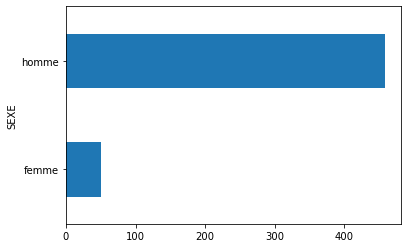

In [73]:
sickgenreangine = isSick.groupby(['SEXE'])['ANGINE'].count()
sickgenreangine  
sickgenreangine.plot.barh(stacked=True)

In [70]:
sickgenre = isSick.groupby(['SEXE']).mean()
sickgenre    

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
SEXE,,,,,,,
femme,56.180000,142.000000,223.340000,0.320000,137.820000,1.336000,1.0
homme,55.868996,133.331878,170.766376,0.336245,126.545852,1.267467,1.0


In [71]:
#sickgenre2 = sickgenre[sickgenre.AGE,sickgenre.CŒUR]
#sickgenre2 = isSick['AGE','CŒUR'],isSick.groupby(['SEXE']).mean()]
#sickgenre2
sickgenre2 = sickgenre.groupby(['SEXE'])[['AGE', 'DEPRESSION ']].mean()
sickgenre2

,AGE,DEPRESSION
SEXE,,
femme,56.180000,1.336000
homme,55.868996,1.267467


In [61]:
sickgenre3 = sickgenre.groupby(['SEXE'])[[ 'PAR','CHOLESTEROL', 'GAJ', 'FCMAX']].mean()
sickgenre3

,PAR,CHOLESTEROL,GAJ,FCMAX
SEXE,,,,
femme,142.000000,223.340000,0.320000,137.820000
homme,133.331878,170.766376,0.336245,126.545852


<AxesSubplot:ylabel='SEXE'>

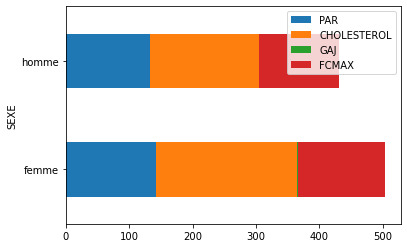

In [42]:
sickgenre3.plot.barh(stacked=True)


In [46]:
sickgenre4 = sickgenre.groupby(['SEXE'])[[ 'PAR','CHOLESTEROL', 'GAJ', 'FCMAX']].mean()
sickgenre4

,PAR,CHOLESTEROL,GAJ,FCMAX
SEXE,,,,
femme,142.000000,223.340000,0.320000,137.820000
homme,133.331878,170.766376,0.336245,126.545852


<AxesSubplot:ylabel='SEXE'>

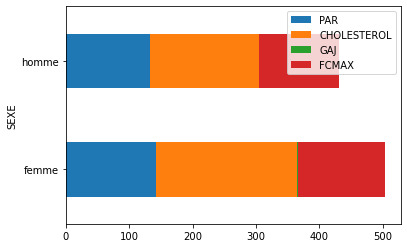

In [47]:
sickgenre4.plot.barh(stacked=True)

In [116]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=[go.Mesh3d(x=isSick['AGE'], y=isSick['SEXE'], z=isSick['FCMAX'], color='lightpink', opacity=0.50)])
fig.show()

In [119]:
import plotly.express as px 
  

fig = px.scatter_3d(isSick, x='AGE', 
                    y='SEXE',  
                    z='FCMAX', 
                    size = 'CHOLESTEROL',
                    color='ANGINE',
                   title="Répartition des hommes & femmes cardiaques par age celon leur fréquence cardiaque, taux de cholestherol et l'angine")
  
fig.show()